# Final parameter estimates

Here we take a look into the parameter estimates from both the broad- and narrow-band modelling.

We need to decide whether to report all different estimates, or whether to adopt the results from a single run as our final parameter estimates.

We decide to report the masked-spectrum red-noise narrow-band analysis results as our final results. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [74]:
import math as mt
import pandas as pd
import seaborn as sb
from pandas import HDFStore
from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import product
from core import *

## Read in the results

In [85]:
pb = pd.Panel(dict(wn = pd.read_hdf('results/pe.h5','bb/wn_nomask'),
                   wm = pd.read_hdf('results/pe.h5','bb/wn_masked'),
                   rn = pd.read_hdf('results/pe.h5','bb/rn_nomask'),
                   rm = pd.read_hdf('results/pe.h5','bb/rn_masked')))

pn = pd.Panel(dict(wn = pd.read_hdf('results/pe.h5','nb/shared_parameters/wn_nomask'),
                   wm = pd.read_hdf('results/pe.h5','nb/shared_parameters/wn_masked'),
                   rn = pd.read_hdf('results/pe.h5','nb/shared_parameters/gp_nomask'),
                   rm = pd.read_hdf('results/pe.h5','nb/shared_parameters/gp_masked')))

pn.wn['k'] = pd.read_hdf('results/pe.h5','nb/radius_ratios/wn_nomask').mean(1)
pn.wm['k'] = pd.read_hdf('results/pe.h5','nb/radius_ratios/wn_masked').mean(1)
pn.rn['k'] = pd.read_hdf('results/pe.h5','nb/radius_ratios/gp_nomask').mean(1)
pn.rm['k'] = pd.read_hdf('results/pe.h5','nb/radius_ratios/gp_masked').mean(1)

## Plots 

NameError: name 'fwn' is not defined

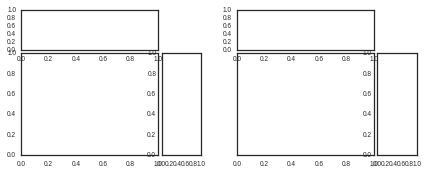

In [86]:
def hexbin2(fig, ax, a1, a2, b1, b2, alim, blim, gs):
    h1 = ax.hexbin(a1, b1, extent=(alim[0],alim[1],blim[0],blim[1]), 
                   gridsize=gs, cmap=plt.cm.Blues)
    h2 = ax.hexbin(a2, b2, extent=(alim[0],alim[1],blim[0],blim[1]), 
                   gridsize=gs, cmap=plt.cm.Greens)
    fig.canvas.draw()
    fc = h1.get_facecolors() + h2.get_facecolors()
    fc *= 0.5
    fc[fc[:,:3].sum(1)>2.9,:] = array([1,1,1,1])
    h2.set_facecolors(fc)
    fig.canvas.draw()
    ax.set_xlim(*klim)
    ax.set_ylim(*blim)
   
cn, cm = cp[2], cp[3]
klim = (0.159,0.18)
blim = (0.810,0.875)
msize, mpad = 0.55, 0.05

with sb.plotting_context('paper', rc=rc_paper):
    fig, axs = subplots(1,2, figsize=(AAPGW,0.75*AAOCW), sharey=True, sharex=True)
    divs = [make_axes_locatable(ax) for ax in axs]
    axhys = [div.append_axes('top',   size=msize, pad=mpad, sharex=axs[i]) for i,div in enumerate(divs)]
    axhxs = [div.append_axes('right', size=msize, pad=mpad, sharey=axs[i]) for i,div in enumerate(divs)]

    hexbin2(fig, axs[0], fwn.k, fwm.k, fwn.b, fwm.b, klim, blim, 25)
    hexbin2(fig, axs[1], frn.k, frm.k, frn.b, frm.b, klim, blim, 25)

    axhys[0].hist(fwn.k,  bins=30, range=klim, alpha=1, normed=True, fc=cn)
    axhys[0].hist(fwm.k,  bins=30, range=klim, alpha=1, normed=True, fc=cm)
    axhxs[0].hist(fwn.b,  bins=30, range=blim, alpha=1, orientation='horizontal', normed=True, fc=cn)
    axhxs[0].hist(fwm.b,  bins=30, range=blim, alpha=1, orientation='horizontal', normed=True, fc=cm)
    axhys[1].hist(frn.k,  bins=30, range=klim, alpha=1, normed=True, fc=cn)
    axhys[1].hist(frm.k,  bins=30, range=klim, alpha=1, normed=True, fc=cm)
    axhxs[1].hist(frn.b,  bins=30, range=blim, alpha=1, orientation='horizontal', normed=True, fc=cn)
    axhxs[1].hist(frm.b,  bins=30, range=blim, alpha=1, orientation='horizontal', normed=True, fc=cm)

    setp(axhys[0].get_yticklabels()+axhys[1].get_yticklabels(), visible=False)
    setp(axhys[0].get_xticklabels()+axhys[1].get_xticklabels(), visible=False)
    setp(axhxs[0].get_yticklabels()+axhxs[1].get_yticklabels(), visible=False)
    setp(axhxs[0].get_xticklabels()+axhxs[1].get_xticklabels(), visible=False)

    [sb.despine(ax=a, left=True) for a in axhys]
    [sb.despine(ax=a, bottom=True) for a in axhxs]

    axs[0].text(0.05, 0.9, 'White noise', size=8, transform=axs[0].transAxes)
    axs[1].text(0.05, 0.9, 'Red noise (GP)', size=8, transform=axs[1].transAxes)

    setp(axs[0], xlim=(0.159,0.18), ylim=blim)
    setp(axhxs, ylim=blim)
    setp(axs[0], xlabel='Radius ratio', ylabel='Impact parameter')
    setp(axs[1], xlabel='Radius ratio')
    fig.tight_layout()
    fig.savefig('plots/pub_white_k_and_k.pdf')

In [17]:
def get_range(p):
    pn = percentile(dfn[p], [0.25,99.75])
    pm = percentile(dfm[p], [0.25,99.75])
    return [min(pn[0],pm[0]),max(pn[1],pm[1])]

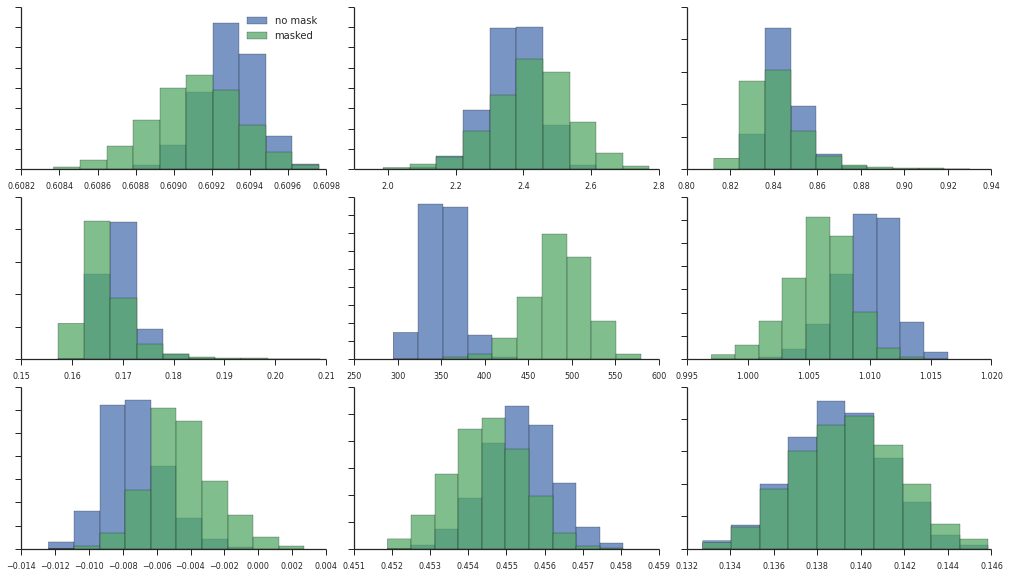

In [18]:
dfn['e_ppm'] = 1e6*dfn.e
dfm['e_ppm'] = 1e6*dfm.e

pars = 'tc rho b k e_ppm c x u v'.split()
cp = sb.color_palette()

with sb.axes_style('ticks'):
    fig,axs = subplots(3,3,figsize=(14,8))
    for i,p in enumerate(pars):
        rng = get_range(p)
        dfn[p].hist(ax=axs.flat[i], fc=cp[0], range=rng, label='no mask', grid=False, alpha=0.75)
        dfm[p].hist(ax=axs.flat[i], fc=cp[1], range=rng, label='masked', grid=False, alpha=0.75)
        setp(axs.flat[i].get_yticklabels(), visible=False)
    axs.flat[0].legend()
    sb.despine(fig)
    fig.tight_layout()

In [40]:
def estimate(d):
    p = array(percentile(d, [50,16,84]))
    return p[0], abs(p[1:]-p[0]).mean()

for p in [pn,pb]:
    for v in ['wm','rm']:
        print '{:7.5f} $\pm$ {:7.5f} &'.format(*around(estimate(p[v].rho),5)),

2.38039 $\pm$ 0.02238 & 2.36902 $\pm$ 0.03409 & 2.47534 $\pm$ 0.04803 & 2.43141 $\pm$ 0.11316 &


In [57]:
pars = 'tc rho b k'.split()

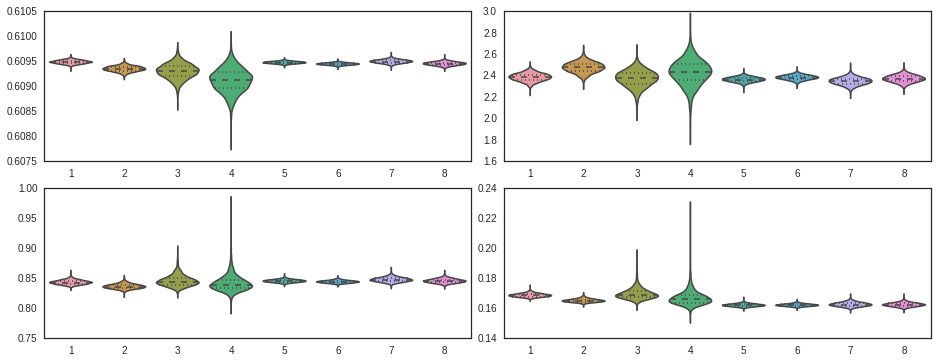

In [78]:
fig,axs = subplots(2,2)
dfs = [pb.wn,pb.wm,pb.rn,pb.rm,pn.wn,pn.wm,pn.rn,pn.rm]
sb.violinplot([df['tc'] for df in dfs], ax=axs.flat[0])
sb.violinplot([df['rho'] for df in dfs], ax=axs.flat[1])
sb.violinplot([df['b'] for df in dfs],   ax=axs.flat[2])
sb.violinplot([df['k'] for df in dfs],   ax=axs.flat[3])
fig.tight_layout()

The differences between the posteriors are relatively insignificant. We adopt the narrow-band red-noise estimates as our final parameter estimates.

In [88]:
for p in pars:
    print '{:4s} & {:7.5f} $\pm$ {:7.5f} \\\\'.format(p, *around(estimate(pn.rm[p]),5))

tc   & 0.60945 $\pm$ 0.00004 \\
rho  & 2.36902 $\pm$ 0.03409 \\
b    & 0.84466 $\pm$ 0.00353 \\
k    & 0.16203 $\pm$ 0.00127 \\


---
<center> &copy; 2015 <a href="mailto:hannu.parviainen@physics.ox.ac.uk">Hannu Parviainen</a></center>